# Name : **Tanishta** **Varman**
# School :**SCDS**
# Email ID : *tanishta.m-26@scds.saiuniversity.edu.in*

# Import Libraires

In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score, f1_score
from tensorflow import keras
tf.random.set_seed(42)


2.17.1


# Import Dataset from Transferlearning Model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from numpy import load
x_train_std=load('/content/drive/MyDrive/Models_1_TL/X_train_std.npy')
x_test_std=load('/content/drive/MyDrive/Models_1_TL/X_test_std.npy')
y_train=load('/content/drive/MyDrive/Models_1_TL/y_train.npy')
y_test=load('/content/drive/MyDrive/Models_1_TL/y_test.npy')

In [4]:
print("x_train_std shape : " .format(x_train_std.shape))
print("x_test_std shape : " .format(x_test_std.shape))

# we now save the best model we got from TL

ft_model=keras.models.load_model('/content/drive/MyDrive/Models_1_TL/01_InceptionV3_TransferLearning_Best_Model.h5')
ft_model.summary()

x_train_std shape : 
x_test_std shape : 


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, None, None, 32) │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, None, None, 32) │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, None, None, 32) │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, None, None, 32) │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, None, None, 32) │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, None, None, 32) │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, None, None, 64) │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, None, None, 64) │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, None, None, 64) │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, None, None, 64) │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, None, None, 80) │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, None, None, 80) │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, None, None, 80) │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, None, None,     │        138,240 │ activation_3[0][0]     │
│                           │ 192)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, None, None,     │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │ 192)                   │                │                        │
├──────────────────────

 Total params: 21,825,321 (83.26 MB)

 Trainable params: 21,786,791 (83.11 MB)

 Non-trainable params: 38,528 (150.50 KB)

 Optimizer params: 2 (12.00 B)

# Freezeing all other layers than the initial 25 %

In [5]:
totallayer=len(ft_model.layers)
index_split=int(0.25 * totallayer)
for i in ft_model.layers[:index_split]:
  i.trainable = False


now we unfreeze the rest after the first 25%




In [6]:
for i in ft_model.layers[index_split:]:
  i.trainable=True

# Now we train the model

In [7]:
ft_model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])
calback_ft = [ keras.callbacks.ModelCheckpoint('bestTL.weights.h5', monitor='val_accuracy', save_best_only=True, save_weights_only=True)]
ft_hist=ft_model.fit(x=x_train_std, y=y_train ,  validation_split=0.1, batch_size=32,epochs=10 , callbacks=calback_ft)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.8164 - loss: 0.8025 - val_accuracy: 0.1795 - val_loss: 1900.9303
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 300ms/step - accuracy: 0.7485 - loss: 0.7120 - val_accuracy: 0.1538 - val_loss: 3597.2988
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 399ms/step - accuracy: 0.9522 - loss: 0.1671 - val_accuracy: 0.2308 - val_loss: 105.0900
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 309ms/step - accuracy: 0.9517 - loss: 0.1344 - val_accuracy: 0.2308 - val_loss: 47.7907
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.9861 - loss: 0.0435 - val_accuracy: 0.1538 - val_loss: 13.8776
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 446ms/step - accuracy: 0.9995 - loss: 0.0175 - val_accuracy: 0.2564 - val_loss: 5.4496
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 401ms/step - accuracy: 0.9993 - loss: 0.0177 - val_accuracy: 0.4615 - val_loss: 2.7294
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 402ms/step - accuracy: 0.9953 - loss: 0.0155 - val_ac

# Graph


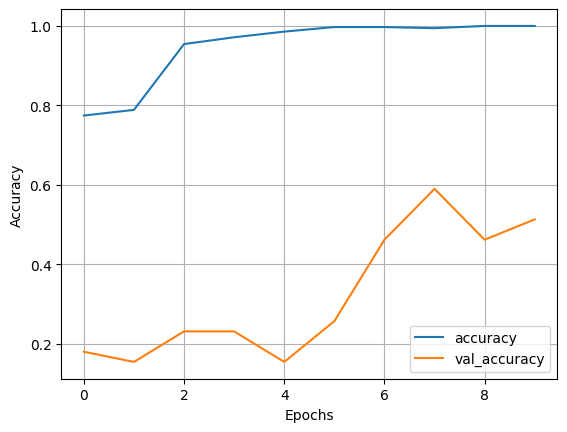

In [8]:
keys=['accuracy' , 'val_accuracy']
progress = { k:v for k , v in ft_hist.history.items() if k in keys}
import pandas as pd
pd.DataFrame(progress).plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

##Loss and Accuracy percentage

In [9]:
testloss_ft, testaccuracy_ft =ft_model.evaluate(x=x_test_std , y=y_test)
print("Test-Loss : %f , Test-Accuracy : %f " % (testloss_ft, testaccuracy_ft))

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6059 - loss: 3.4037
Test-Loss : 3.113282 , Test-Accuracy : 0.584615 


In [10]:
ft_model.load_weights("bestTL.weights.h5")
testloss_ft, testaccuracy_ft = ft_model.evaluate(x=x_test_std, y=y_test)
print("Test-Loss : %f , Test-Accuracy : %f " % (testloss_ft, testaccuracy_ft))

# prediction

pr=ft_model.predict(x_test_std)
label=np.argmax(pr, axis=-1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5666 - loss: 12.7607 
Test-Loss : 10.643687 , Test-Accuracy : 0.546154 
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


# Confusion matirx

[[18  3  0  2  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 6  1  1  0  2  0  0]
 [ 5  2  0  9  0  0  0]
 [ 4  3  0  2 12  0  0]
 [12  1  0  5  0  4  0]
 [10  0  0  1  0  0  7]]


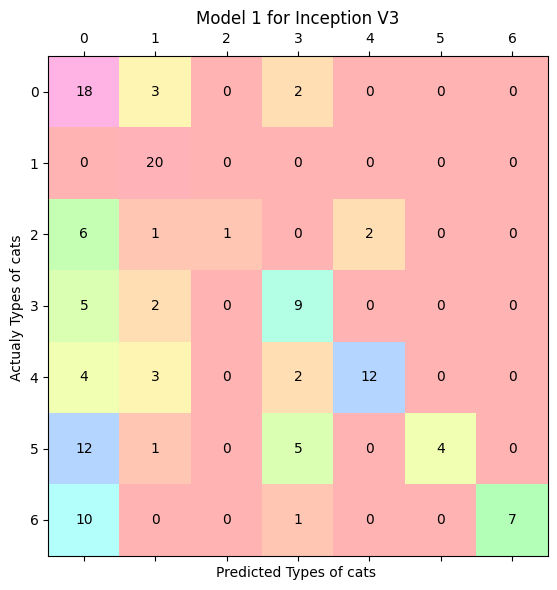

In [11]:
# the matrxi
cm=confusion_matrix(y_true= y_test , y_pred=label)
print(cm)
fig , ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap=plt.cm.hsv, alpha=0.3)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(x=j, y=i, s=cm[i,j], va='center', ha= 'center')

ax.title.set_text('Model 1 for Inception V3')
plt.xlabel('Predicted Types of cats ')
plt.ylabel ('Actualy Types of cats ')
plt.tight_layout()
plt.savefig("ConfusionMatrix.png",dpi=300, format='png',pad_inches=0.3)
plt.show()

In [12]:
# Precision , Recall , F1
precision_score_model1=precision_score(y_true=y_test , y_pred=label , average='weighted')
print("The precision score of the model = " , precision_score_model1)

recall_score_model1=recall_score(y_true=y_test , y_pred=label , average='weighted')
print("The recall score of the model = " , recall_score_model1)

f1_score_model1=f1_score(y_true=y_test , y_pred=label , average='weighted')
print("The F1 score of the model = " , f1_score_model1)

The precision score of the model =  0.741842718684824
The recall score of the model =  0.5461538461538461
The F1 score of the model =  0.5223951433182202


# Now we save the best model

In [13]:
ft_model.save('/content/drive/MyDrive/Models_1_TL/02_InceptionV3_FineTuning_Best_Model.h5')